Question 1

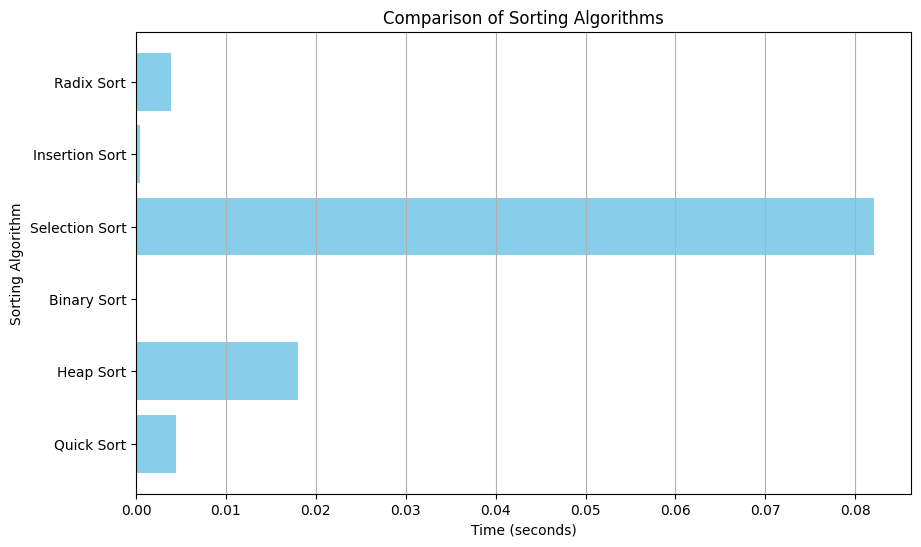

In [ ]:
import time
import random
import matplotlib.pyplot as plt

# Function to generate a list of random integers
def generate_random_numbers(n):
    # Generates random numbers between 1 and 10000
    return [random.randint(1, 10000) for _ in range(n)]

# Sorting algorithms

# Quick sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    
    # Choosing a pivot element 
    pivot = arr[len(arr) // 2]
    
    # Partitioning the array
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    # Recursively applying quick sort
    return quick_sort(left) + middle + quick_sort(right)

# Heap sort
def heap_sort(arr):
    # Helper function to heapify
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[i] < arr[l]:
            largest = l
        if r < n and arr[largest] < arr[r]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    # Building a max heap
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i)
        
    # Extracting elements from the heap
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

# Binary sort
def binary_sort(arr):
    # Using Python's sorting function
    return sorted(arr)

# Selection sort
def selection_sort(arr):
    # Finding and swapping the minimum element
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Insertion sort
def insertion_sort(arr):
    # Inserting each element into its correct position
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Radix sort
def radix_sort(arr):
    # Helper function for counting sort
    def counting_sort(arr, exp):
        n = len(arr)
        output = [0] * n
        count = [0] * 10

        for i in range(n):
            index = arr[i] // exp
            count[index % 10] += 1

        for i in range(1, 10):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1

        for i in range(n):
            arr[i] = output[i]

    # Finding the maximum element
    max_value = max(arr)
    exp = 1
    # Applying counting sort for each digit
    while max_value // exp > 0:
        counting_sort(arr, exp)
        exp *= 10
    return arr

# Function to measure sorting time
def measure_sorting_time(sort_func, arr):
    # Recording start time
    start_time = time.time()
    # Sorting the array
    sorted_arr = sort_func(arr)
    # Recording end time
    end_time = time.time()
    # Calculating time taken
    return end_time - start_time

# Main function
if __name__ == "__main__":
    # Dictionary holding sorting algorithms
    sorting_algorithms = {
        "Quick Sort": quick_sort,
        "Heap Sort": heap_sort,
        "Binary Sort": binary_sort,
        "Selection Sort": selection_sort,
        "Insertion Sort": insertion_sort,
        "Radix Sort": radix_sort
    }

    # Number of random numbers
    num_random_numbers = 1000
    # Generating random numbers
    random_numbers = generate_random_numbers(num_random_numbers)

    # Dictionary to store sorting time
    time_taken = {}
    # Measuring sorting time for each algorithm
    for algorithm_name, sort_func in sorting_algorithms.items():
        time_taken[algorithm_name] = measure_sorting_time(sort_func, random_numbers)

    # Plotting the results
    algorithms = list(time_taken.keys())
    time_values = list(time_taken.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, time_values, color='skyblue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sorting Algorithm')
    plt.title('Comparison of Sorting Algorithms')
    plt.grid(axis='x')
    plt.show()


Question 2

In [ ]:
import heapq

def merge_sorted_lists(sorted_lists):
    # Initialize an empty heap and result list
    heap = []
    result = []

    # Initialize heap with the first element from each sorted list
    for i, lst in enumerate(sorted_lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))  # (element, list index, element index)

    # Merge process
    while heap:
        # Pop the smallest element from the heap
        val, list_index, element_index = heapq.heappop(heap)
        result.append(val)

        # If there are more elements in the same list, push the next element to the heap
        if element_index + 1 < len(sorted_lists[list_index]):
            next_val = sorted_lists[list_index][element_index + 1]
            heapq.heappush(heap, (next_val, list_index, element_index + 1))

    return result

# Example usage:
sorted_lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]

sorted_result = merge_sorted_lists(sorted_lists)
print("Sorted lists merged into one sorted list:", sorted_result)


Sorted lists merged into one sorted list: [10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


Question 3

In [ ]:
def find_k_largest_elements(arr, k):
    # Sorting the array in descending order
    sorted_arr = sorted(arr, reverse=True)

    # Selecting the first K elements after sorting to get the K largest elements
    k_largest_elements = sorted_arr[:k]

    return k_largest_elements  # Returning the K largest elements found

# Example usage:
arr = [5, 12, 3, 8, 9, 10, 1]
k = 3
k_largest_elements = find_k_largest_elements(arr, k)
print("K largest elements:", k_largest_elements)  # Printing the K largest elements found


K largest elements: [12, 10, 9]


Question 4

In [ ]:
def max_activities(activities):
    # First we sort the activities based on their finishing times
    sorted_activities = sorted(activities, key=lambda x: x[1])

    selected_activities = [sorted_activities[0]]  # We start with the first activity

    # Now let us iterate through the sorted activities to find the maximum number of non-overlapping activities
    for i in range(1, len(sorted_activities)):
        start finish = sorted_activities[i]
        last_finish = selected_activities[-1][1]

        # We check if the current activity can be selected without overlap
        if start >= last_finish:
            selected_activities.append((start, finish))  # If it does not overlap, we add it to the selected_activities list

    return selected_activities  # Finally we return the selected activities without overlap

# Example input of activities
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

# Let us find the maximum number of non-overlapping activities
selected_activities = max_activities(activities)
print("Maximum number of non-overlapping activities:", len(selected_activities))
print("Selected activities:", selected_activities)


Maximum number of activities performed: [(1, 4), (5, 7), (8, 11), (12, 14)]


Question 5

In [ ]:
def merge_intervals(intervals):
    # Sort intervals based on start time
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged_intervals = []  # Initialize an empty list to store merged intervals

    # Iterate through sorted intervals
    for interval in sorted_intervals:
        if not merged_intervals or interval[0] > merged_intervals[-1][1]:
            # If the current interval does not overlap with the last merged interval
            merged_intervals.append(interval)
        else:
            # If the current interval overlaps with the last merged interval, merge them
            merged_intervals[-1] = (merged_intervals[-1][0], max(merged_intervals[-1][1], interval[1]))

    return merged_intervals  # Return the merged intervals

# Example input of intervals
intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]

# Merge overlapping intervals
merged_intervals = merge_intervals(intervals)
print("Merged intervals:", merged_intervals)


Merged intervals: [(1, 5), (6, 9)]
